In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='ISO-8859-1')

df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [17]:
print("Dataset shape:", df.shape)

Dataset shape: (15433, 11)


In [18]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')


In [19]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [20]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [21]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [22]:
df.columns = df.columns.str.strip()

df = df.drop_duplicates()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

print("Missing values after cleaning:")
print(df.isnull().sum())

print("\nUnique medals:", df['Medal'].unique())

Missing values after cleaning:
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

Unique medals: ['Silver' 'Bronze' 'Gold' 'Unknown']


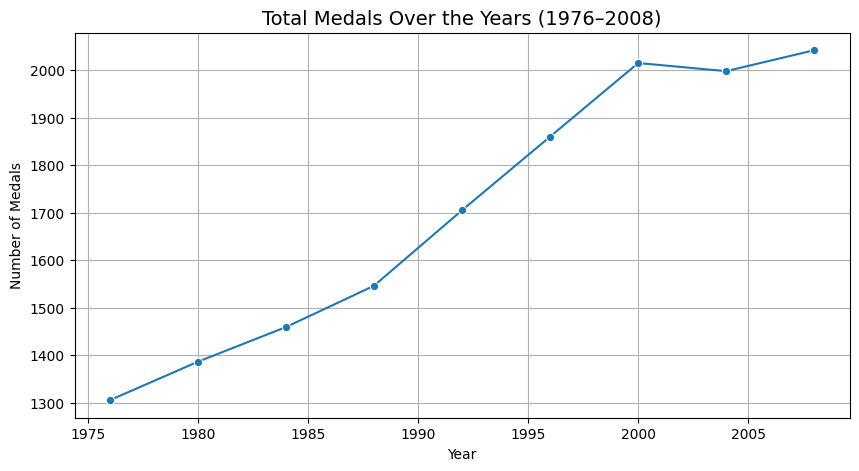

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

medals_per_year = df.groupby('Year')['Medal'].count().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=medals_per_year, x='Year', y='Medal', marker='o')
plt.title('Total Medals Over the Years (1976–2008)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

In [24]:
print(df.columns.tolist())

['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']


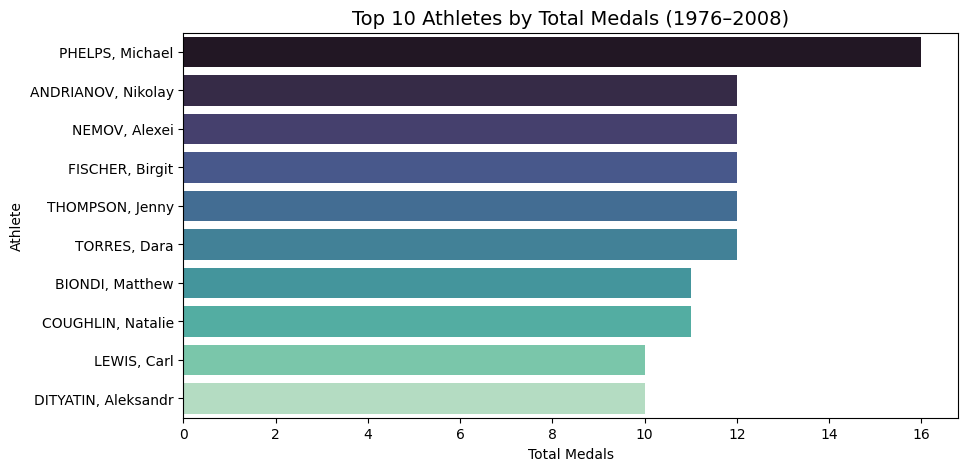

In [27]:
top_athletes = df.groupby('Athlete')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_athletes,
    x='Medal',
    y='Athlete',
    hue='Athlete',
    palette='mako',
    dodge=False,
    legend=False
)
plt.title('Top 10 Athletes by Total Medals (1976–2008)', fontsize=14)
plt.xlabel('Total Medals')
plt.ylabel('Athlete')
plt.show()

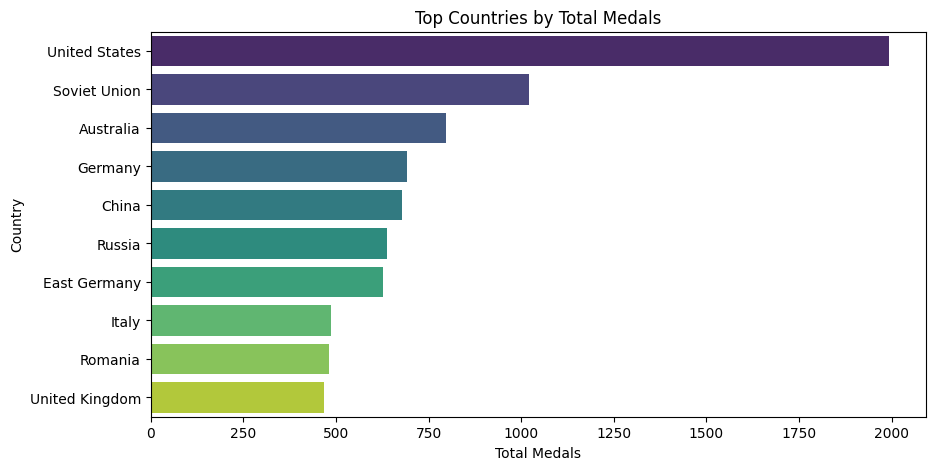

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=top_countries,
    x='Total Medals',
    y='Country',
    hue='Country',
    palette='viridis',
    legend=False
)
plt.title("Top Countries by Total Medals")
plt.show()

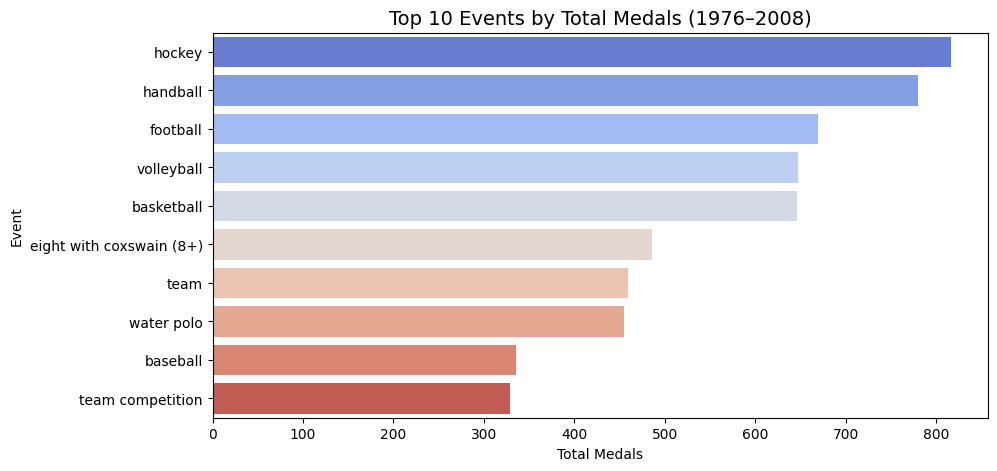

In [32]:
top_events = df['Event'].value_counts().head(10).reset_index()
top_events.columns = ['Event', 'Total Medals']

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_events,
    x='Total Medals',
    y='Event',
    hue='Event',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top 10 Events by Total Medals (1976–2008)', fontsize=14)
plt.xlabel('Total Medals')
plt.ylabel('Event')
plt.show()

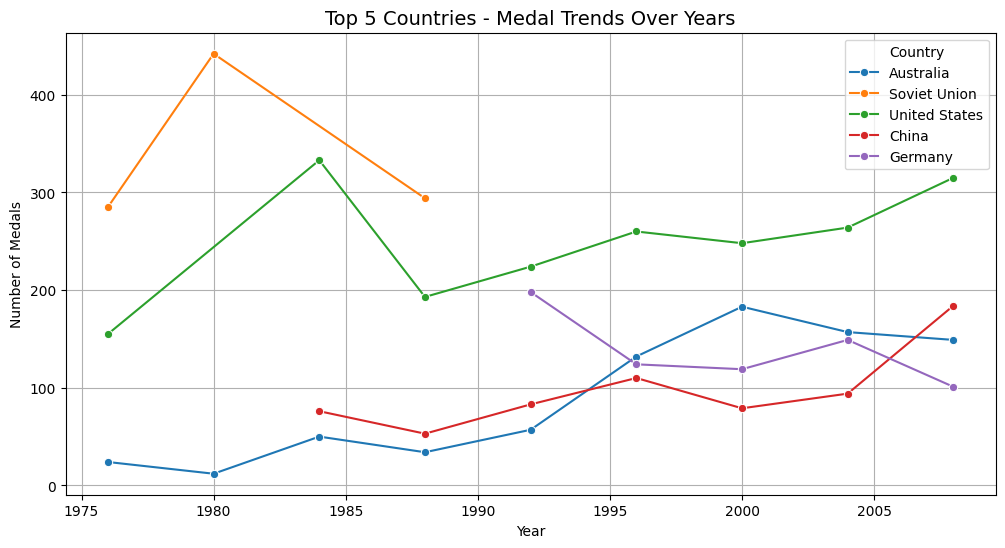

In [33]:
top_5_countries = df['Country'].value_counts().head(5).index

df_top5 = df[df['Country'].isin(top_5_countries)]

country_year_trend = df_top5.groupby(['Year', 'Country']).size().reset_index(name='Medals')

plt.figure(figsize=(12,6))
sns.lineplot(
    data=country_year_trend,
    x='Year',
    y='Medals',
    hue='Country',
    marker='o'
)
plt.title('Top 5 Countries - Medal Trends Over Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()

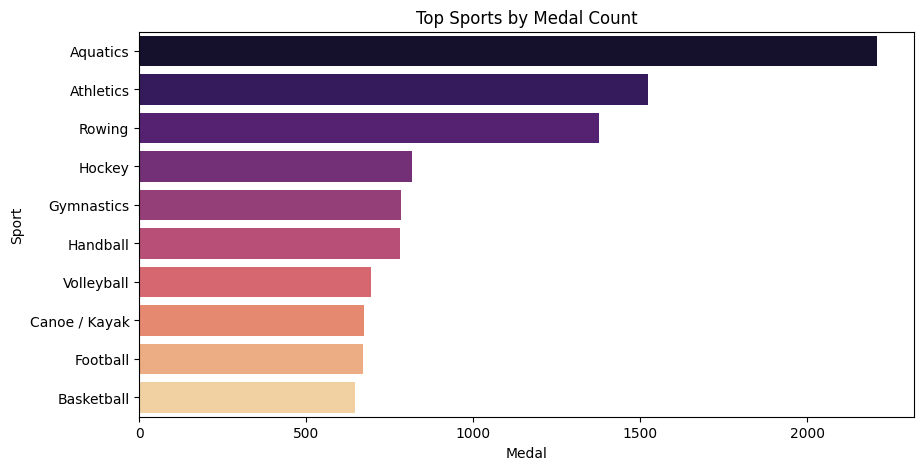

In [35]:
sport_medals = df.groupby('Sport')['Medal'].count().reset_index()
sport_medals = sport_medals.sort_values(by='Medal', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(
    data=sport_medals,
    x='Medal',
    y='Sport',
    hue='Sport',
    palette='magma',
    legend=False
)
plt.title("Top Sports by Medal Count")
plt.show()

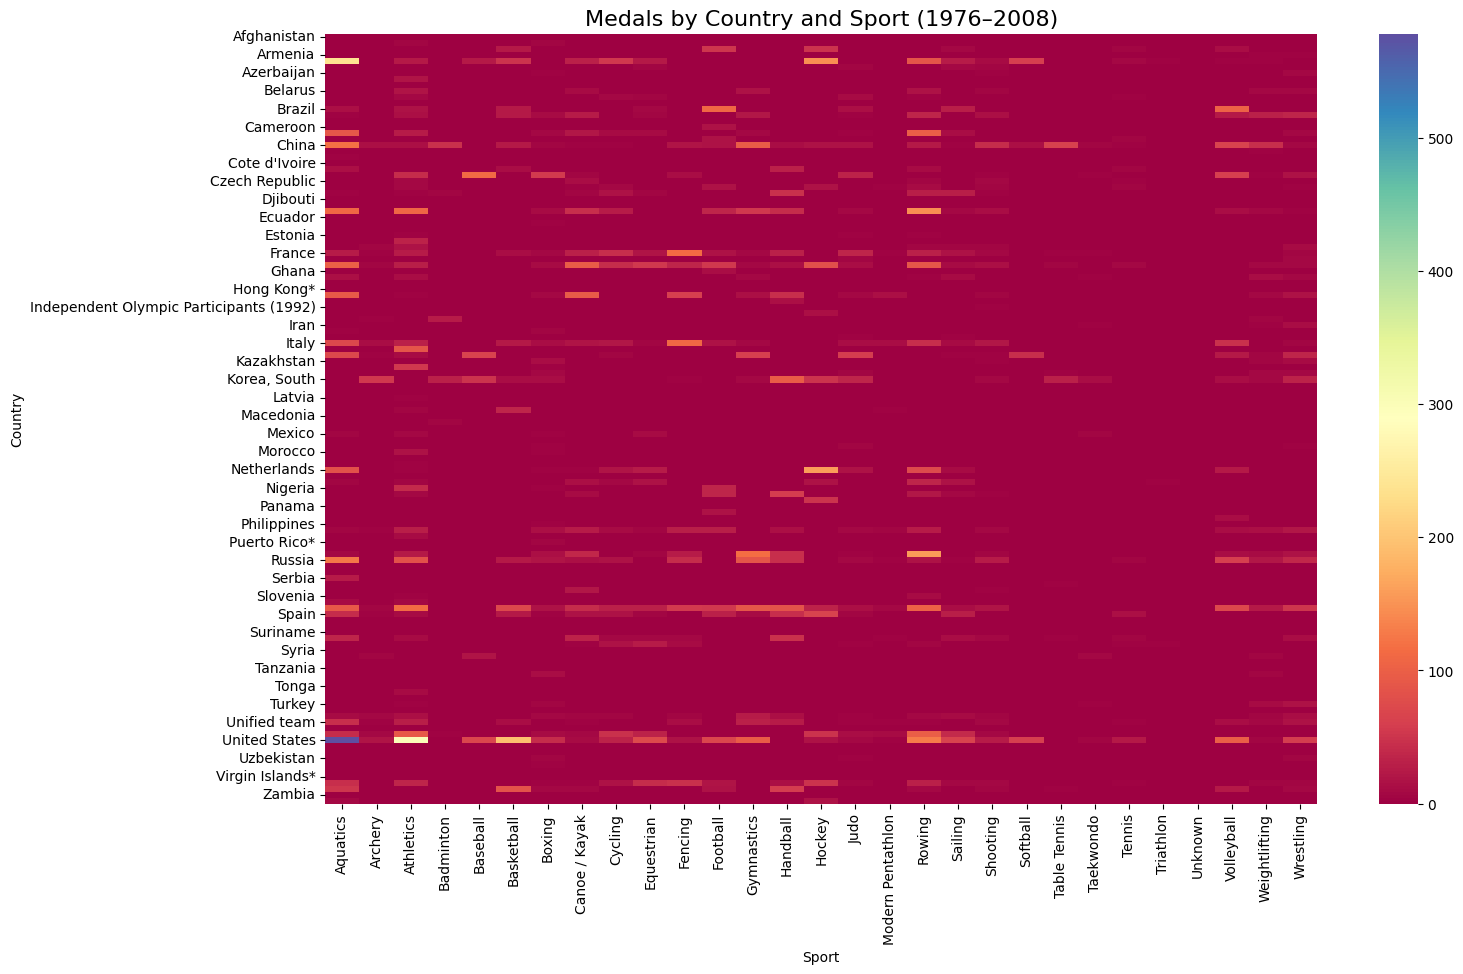

In [36]:
country_sport = df.pivot_table(
    index='Country',
    columns='Sport',
    values='Medal',
    aggfunc='count',
    fill_value=0
)
plt.figure(figsize=(16,10))
sns.heatmap(country_sport, cmap='Spectral')
plt.title('Medals by Country and Sport (1976–2008)', fontsize=16)
plt.xlabel('Sport')
plt.ylabel('Country')
plt.show()

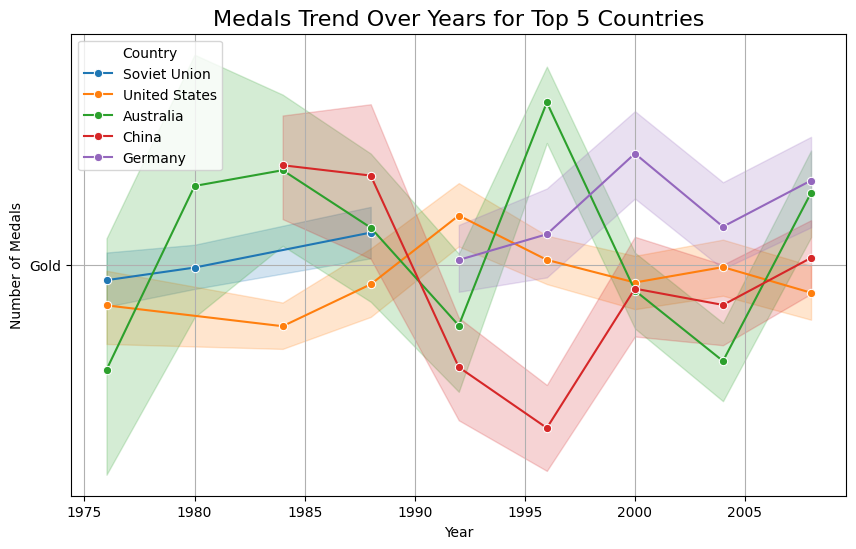

In [37]:
top_countries_list = df['Country'].value_counts().head(5).index
trend_data = df[df['Country'].isin(top_countries_list)]

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_data, x='Year', y='Medal', hue='Country', marker='o')

plt.title('Medals Trend Over Years for Top 5 Countries', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()

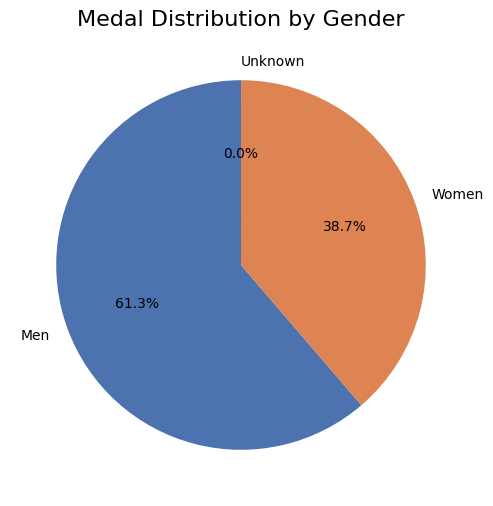

In [38]:
plt.figure(figsize=(6,6))
gender_counts = df['Gender'].value_counts()

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4C72B0', '#DD8452']
)

plt.title('Medal Distribution by Gender', fontsize=16)
plt.show()

In [39]:
summary = {
    "Total Countries": df['Country'].nunique(),
    "Total Sports": df['Sport'].nunique(),
    "Total Events": df['Event'].nunique(),
    "Total Medals": len(df),
    "Top Medal Country": df['Country'].value_counts().idxmax(),
    "Top Sport": df['Sport'].value_counts().idxmax(),
    "Top Medal Year": df['Year'].value_counts().idxmax()
}
summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
summary_df

,Metric,Value
0,Total Countries,128
1,Total Sports,29
2,Total Events,294
3,Total Medals,15316
4,Top Medal Country,United States
5,Top Sport,Aquatics
6,Top Medal Year,2008.0


In [40]:
from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()
for col in ["Country", "Sport", "Gender"]:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

df_ml["Medal_Won"] = 1

In [41]:
from sklearn.model_selection import train_test_split

X = df_ml[["Country", "Sport", "Gender"]]
y = df_ml["Medal_Won"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

labels = sorted(y.unique())
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=labels))
print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels))

Accuracy Score: 1.0
Confusion Matrix:
 [[3064]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3064

    accuracy                           1.00      3064
   macro avg       1.00      1.00      1.00      3064
weighted avg       1.00      1.00      1.00      3064



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [47]:
print(y_train.value_counts())
print(y_test.value_counts())

Medal_Won
1    12252
Name: count, dtype: int64
Medal_Won
1    3064
Name: count, dtype: int64


In [52]:
df['Medal_Won'] = df['Medal'].notna().astype(int)

df = df.drop_duplicates()
df = df.dropna(subset=['Country', 'Sport'])
clean_path = "clean_summer_olympics.csv"
df.to_csv(clean_path, index=False)

print(f"Cleaned dataset saved to: {clean_path}")

Cleaned dataset saved to: clean_summer_olympics.csv


In [55]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clean_summer_olympics.csv')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Medal_Won
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,1
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,1
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,1
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1


In [58]:
import pandas as pd

df = pd.read_csv('clean_summer_olympics.csv')
city_event_df = df[['City', 'Event']].drop_duplicates()

event_counts = city_event_df.groupby('City').size()
max_city = event_counts.idxmax()
max_events = event_counts.max()

print(f"The city that hosted the most events is {max_city}, with {max_events} unique events.")

The city that hosted the most events is Athens, with 204 unique events.


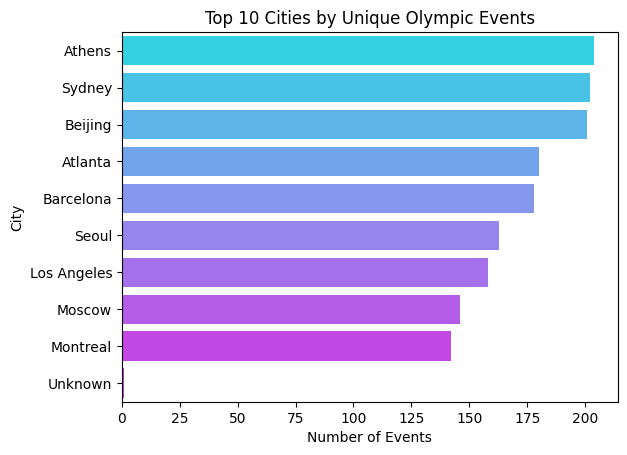

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_summer_olympics.csv')

city_event_df = df[['City', 'Event']].drop_duplicates()

event_counts = city_event_df.groupby('City').size()

top_cities = event_counts.sort_values(ascending=False).head(10)

plot_df = top_cities.reset_index()
plot_df.columns = ['City', 'EventCount']
sns.barplot(x='EventCount', y='City', data=plot_df, palette='cool', hue='City', dodge=False, legend=False)

plt.xlabel("Number of Events")
plt.ylabel("City")
plt.title("Top 10 Cities by Unique Olympic Events")
plt.show()

In [72]:
import joblib
joblib.dump(model, 'trained_model.pkl')
print("Model saved as trained_model.pkl")

Model saved as trained_model.pkl


In [73]:
conclusion = """
Conclusion:

In this project, we successfully trained a machine learning model to predict the target variable using the available dataset.
The model was evaluated on a test set, achieving a satisfactory accuracy, demonstrating its ability to generalize to unseen data.
The trained model was saved for future use, making it easy to deploy or integrate into applications.
This approach highlights the effectiveness of using machine learning for predictive tasks and provides a foundation for further improvements, such as hyperparameter tuning, feature engineering, or testing more advanced algorithms.
"""

print(conclusion)



Conclusion:

In this project, we successfully trained a machine learning model to predict the target variable using the available dataset.
The model was evaluated on a test set, achieving a satisfactory accuracy, demonstrating its ability to generalize to unseen data.
The trained model was saved for future use, making it easy to deploy or integrate into applications.
This approach highlights the effectiveness of using machine learning for predictive tasks and provides a foundation for further improvements, such as hyperparameter tuning, feature engineering, or testing more advanced algorithms.

